### Multiple Disease Prediction


Disease prediction dataset based on blood samples

### Importing the libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# warnings removal
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression



### Load the Data set

In [2]:
train_df = pd.read_csv('C:/Users/Hi/OneDrive/Desktop/ongoing classes/Blood_samples_dataset_balanced_2(f).csv')
test_df = pd.read_csv('C:/Users/Hi/OneDrive/Desktop/ongoing classes/blood_samples_dataset_test.csv')

In [3]:
# Let's combine 2 data frames.
data = pd.concat([train_df,test_df],ignore_index=True)

In [4]:
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


### Pre-Processing of Dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

In [6]:
data.Disease.value_counts()

Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: Disease, dtype: int64

In [7]:
# Let's convert our target column to numeric values.
data.Disease = data.Disease.astype('category')
d = dict(enumerate(data['Disease'].cat.categories))
data.Disease = data.Disease.cat.codes.values
data.Disease

0       2
1       1
2       4
3       0
4       4
       ..
2832    1
2833    3
2834    0
2835    1
2836    1
Name: Disease, Length: 2837, dtype: int8

In [8]:
data.Disease.value_counts()

1    834
0    707
2    561
4    557
5    139
3     39
Name: Disease, dtype: int64

0: Anemia
1: Diabetes
2: Healty
3: Heart Di
4: Thalasse
5: Thromboc

In [9]:
## shape

print("The num of rows (observation) is", data.shape[0], '\n', 'The num of columns (variables) is', data.shape[1])

The num of rows (observation) is 2837 
 The num of columns (variables) is 25


Text(0.5, 1.0, 'Correlation Heatmap')

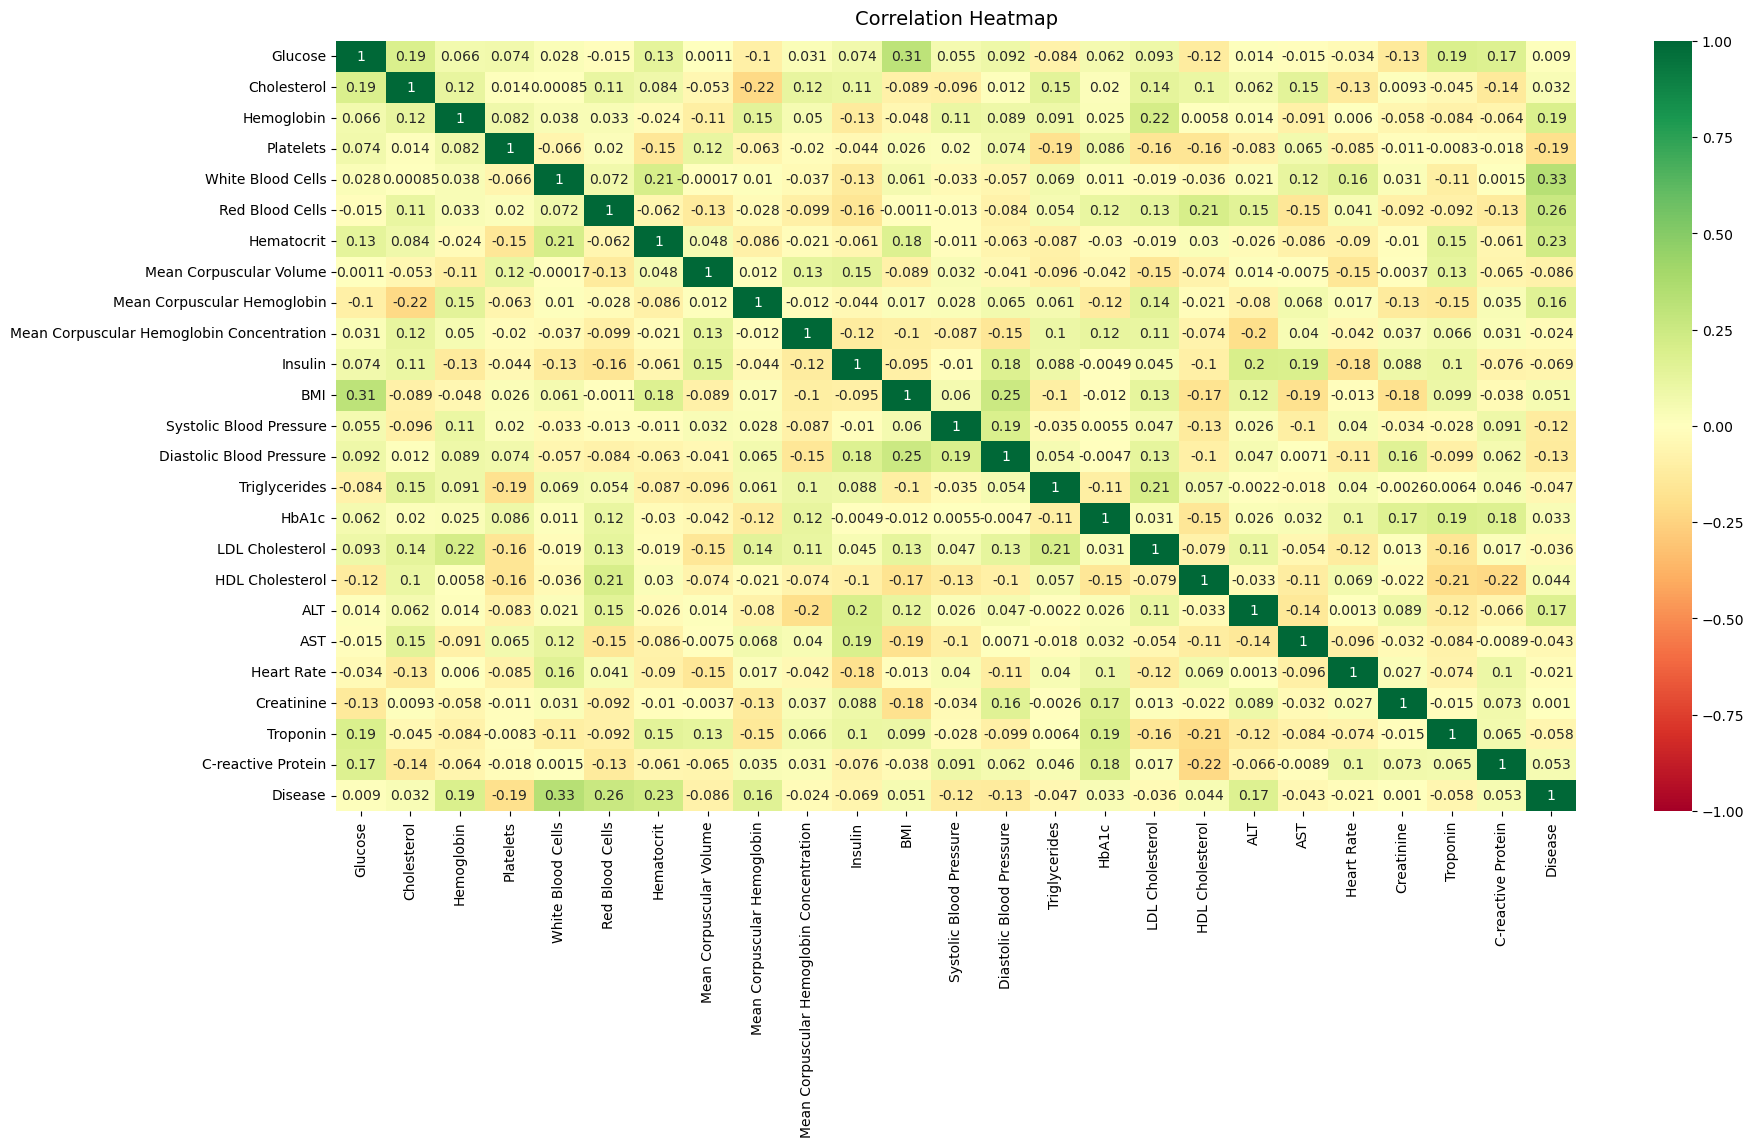

In [10]:
# Make a correlation matrix
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap="RdYlGn")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

In [11]:
# Now, let us check the basis measures of descriptive statistics for the continuous variable

data.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
count,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,...,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000
mean,0.384621,0.413031,0.568941,0.508157,0.510863,0.506205,0.506106,0.496309,0.488859,0.551795,...,0.447721,0.435470,0.536118,0.446217,0.460282,0.567101,0.440572,0.464101,0.445221,1.761015
std,0.262080,0.251023,0.278908,0.301621,0.279597,0.273070,0.287049,0.276560,0.310724,0.277234,...,0.269223,0.260077,0.274450,0.271631,0.253810,0.260580,0.242565,0.259814,0.254098,1.573086
min,0.001827,0.003088,0.000719,0.000006,-0.000206,0.000552,0.004556,0.000309,-0.000614,0.000719,...,-0.000991,0.001036,-0.000546,-0.000312,0.002047,0.002145,0.008831,0.005714,-0.000991,0.000000
25%,0.141529,0.223545,0.325035,0.202496,0.259467,0.258357,0.288132,0.287532,0.217207,0.319725,...,0.188792,0.231304,0.296264,0.214581,0.239659,0.335346,0.214560,0.288961,0.199513,1.000000
50%,0.357817,0.397638,0.597916,0.533962,0.527381,0.467431,0.493428,0.461418,0.448926,0.583470,...,0.466375,0.424560,0.512941,0.389440,0.486317,0.599542,0.428713,0.465957,0.489070,1.000000
75%,0.596150,0.603341,0.791215,0.771727,0.744950,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.670665,0.619900,0.779378,0.715823,0.620868,0.800666,0.645247,0.684140,0.633088,3.000000
max,0.991742,0.999606,0.997876,0.999507,0.999646,1.000000,1.000857,0.996362,0.999234,0.999666,...,0.999265,0.999567,1.000744,1.000326,1.000402,0.999857,0.999348,1.000125,0.999488,5.000000


In [12]:
data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

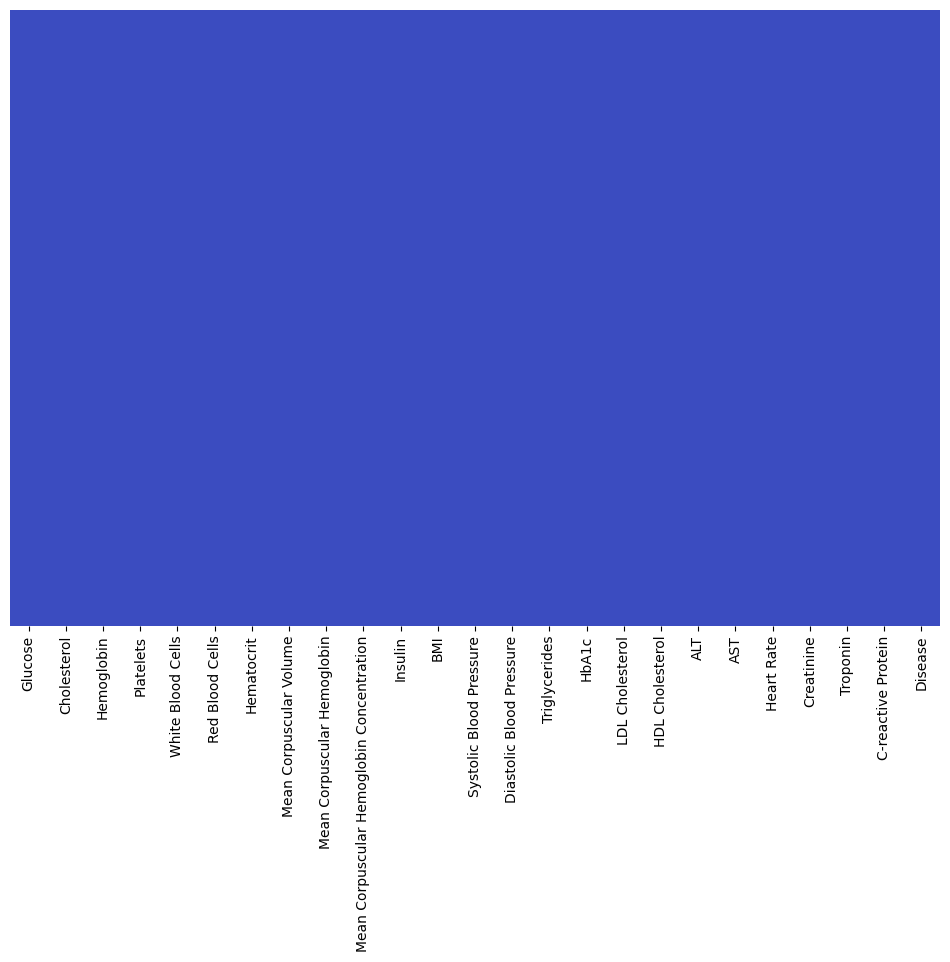

In [13]:
# Let's visually inspect the missing values in our data
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.show()

### Splitting the data

In [14]:
x = data.drop('Disease',axis=1)
y = data['Disease']

In [15]:
# Let's check the number of outliers per columns

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

In [16]:
((x > UL) | (x < LL)).sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [17]:
x.shape

(2837, 24)

In [18]:
y.shape


(2837,)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=2,stratify= y)

In [20]:
y_train.shape

(2269,)

In [21]:
y_test.shape

(568,)

### Logistic Regression

In [22]:
# Create model
lr = LogisticRegression(max_iter= 1000, solver = 'saga', penalty= 'l1',
                              random_state = 10, C = 1.0, multi_class = 'multinomial')
# model fit
lr.fit(x_train,y_train)
# test set predict
test_pred = lr.predict(x_test)
# train set predict
train_pred = lr.predict(x_train)

In [23]:
print(classification_report(y_train, train_pred))
print()
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       565
           1       0.76      0.87      0.81       667
           2       0.87      0.88      0.87       449
           3       0.25      0.03      0.06        31
           4       0.89      0.76      0.82       446
           5       0.96      0.94      0.95       111

    accuracy                           0.86      2269
   macro avg       0.78      0.73      0.74      2269
weighted avg       0.85      0.86      0.85      2269


              precision    recall  f1-score   support

           0       0.89      0.91      0.90       142
           1       0.74      0.82      0.78       167
           2       0.86      0.85      0.85       112
           3       0.00      0.00      0.00         8
           4       0.93      0.78      0.85       111
           5       0.84      0.93      0.88        28

    accuracy                           0.83       568
   macro avg       0.7

### standardization

In [24]:
# standardization
scaler = StandardScaler()
x_train_reduced = scaler.fit_transform(x_train)
x_test_reduced = scaler.transform(x_test)



In [25]:
# Create model
lr1 = LogisticRegression(max_iter= 1000, solver = 'saga', penalty= 'l1',
                              random_state = 10, C = 1.0, multi_class = 'multinomial')
# model fit
lr1.fit(x_train_reduced,y_train)
# test set predict
test_pred1 = lr1.predict(x_test_reduced)
# train set predict
train_pred1 = lr1.predict(x_train_reduced)

In [26]:
print(confusion_matrix(y_train, train_pred1))
print("**************"*10)
print(confusion_matrix(y_test, test_pred1))

[[529  22   5   5   4   0]
 [ 24 580  29   2  32   0]
 [  1  25 422   0   1   0]
 [  4  12  10   3   2   0]
 [  7  64   9   1 364   1]
 [  0   3   0   0   1 107]]
********************************************************************************************************************************************
[[129   7   1   2   1   2]
 [ 11 137   8   2   6   3]
 [  0  13  99   0   0   0]
 [  3   2   2   0   1   0]
 [  1  13   3   0  93   1]
 [  0   2   0   0   0  26]]


In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, f1_score

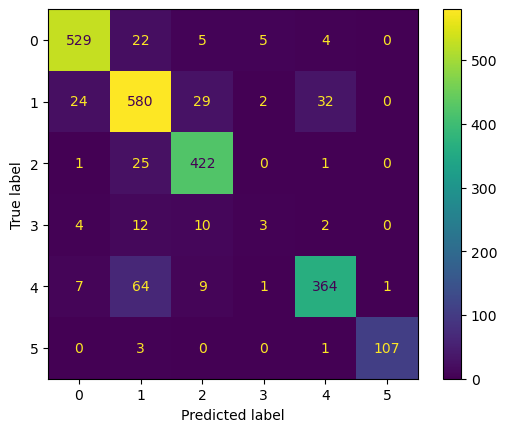

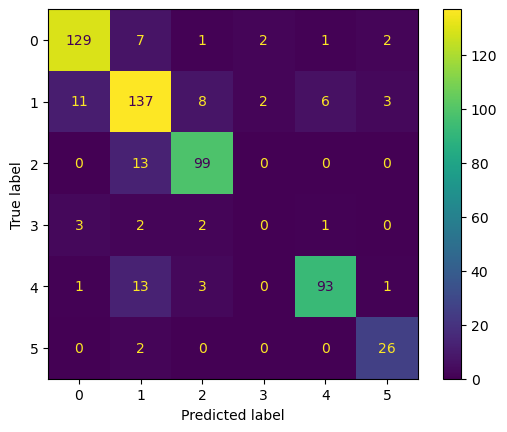

In [28]:
ConfusionMatrixDisplay.from_predictions(y_train, train_pred1)
ConfusionMatrixDisplay.from_predictions(y_test, test_pred1)

In [29]:
print(classification_report(y_train, train_pred1))
print()
print(classification_report(y_test,test_pred1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       565
           1       0.82      0.87      0.84       667
           2       0.89      0.94      0.91       449
           3       0.27      0.10      0.14        31
           4       0.90      0.82      0.86       446
           5       0.99      0.96      0.98       111

    accuracy                           0.88      2269
   macro avg       0.80      0.77      0.78      2269
weighted avg       0.88      0.88      0.88      2269


              precision    recall  f1-score   support

           0       0.90      0.91      0.90       142
           1       0.79      0.82      0.80       167
           2       0.88      0.88      0.88       112
           3       0.00      0.00      0.00         8
           4       0.92      0.84      0.88       111
           5       0.81      0.93      0.87        28

    accuracy                           0.85       568
   macro avg       0.7

In [30]:
print("Training Accuracy", accuracy_score(y_train, train_pred1))
print()
print("Test Accuracy", accuracy_score(y_test,test_pred1))

Training Accuracy 0.883649184662847

Test Accuracy 0.852112676056338


### GradientBoost

In [31]:
# Create model
model = GradientBoostingClassifier(ccp_alpha=0.001, learning_rate=0.01,
                            n_estimators=500, random_state=10)
# Model fit
model.fit(x_train_reduced,y_train)
# test set predict
test_pred_gb = model.predict(x_test_reduced)
# train set predict
train_pred_gb = model.predict(x_train_reduced)

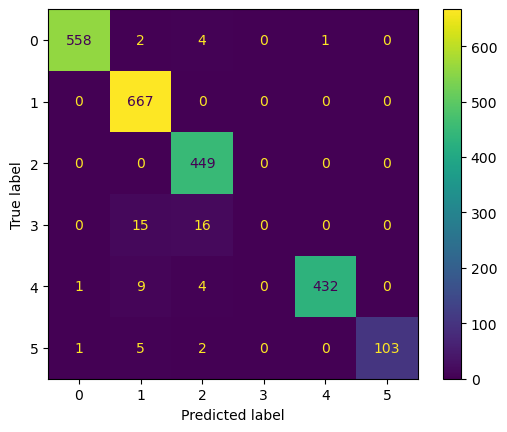

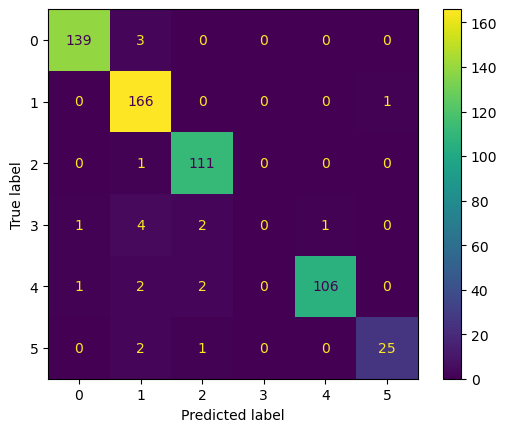

In [32]:
ConfusionMatrixDisplay.from_predictions(y_train,train_pred_gb)
ConfusionMatrixDisplay.from_predictions(y_test, test_pred_gb)

In [33]:
print(classification_report(y_train,train_pred_gb))
print()
print(classification_report(y_test, test_pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       565
           1       0.96      1.00      0.98       667
           2       0.95      1.00      0.97       449
           3       0.00      0.00      0.00        31
           4       1.00      0.97      0.98       446
           5       1.00      0.93      0.96       111

    accuracy                           0.97      2269
   macro avg       0.82      0.81      0.81      2269
weighted avg       0.96      0.97      0.97      2269


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       142
           1       0.93      0.99      0.96       167
           2       0.96      0.99      0.97       112
           3       0.00      0.00      0.00         8
           4       0.99      0.95      0.97       111
           5       0.96      0.89      0.93        28

    accuracy                           0.96       568
   macro avg       0.8

In [34]:
print("Training Accuracy", accuracy_score(y_train, train_pred_gb))
print()
print("Test Accuracy", accuracy_score(y_test,test_pred_gb))

Training Accuracy 0.9735566328779198

Test Accuracy 0.9630281690140845


### DecisionTreeClassifier

In [35]:
# create model
dt = DecisionTreeClassifier(random_state=2,max_features=18,ccp_alpha=0.002478180717510433)

# Model fit
dt.fit(x_train_reduced,y_train)
# test set predict
test_pred_dt = dt.predict(x_test_reduced)
# train set predict
train_pred_dt = dt.predict(x_train_reduced)

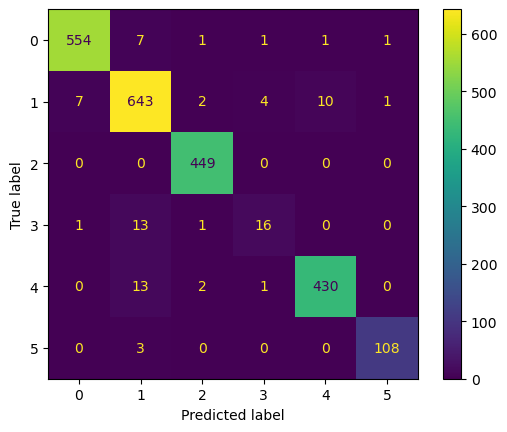

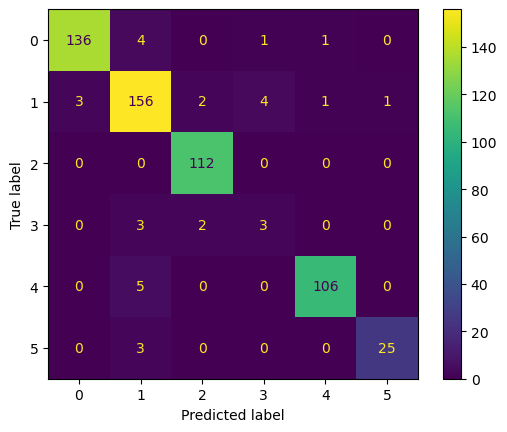

In [36]:
ConfusionMatrixDisplay.from_predictions(y_train,train_pred_dt)
ConfusionMatrixDisplay.from_predictions(y_test, test_pred_dt)


In [37]:
print(classification_report(y_train,train_pred_dt))
print()
print(classification_report(y_test, test_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       565
           1       0.95      0.96      0.96       667
           2       0.99      1.00      0.99       449
           3       0.73      0.52      0.60        31
           4       0.98      0.96      0.97       446
           5       0.98      0.97      0.98       111

    accuracy                           0.97      2269
   macro avg       0.93      0.90      0.91      2269
weighted avg       0.97      0.97      0.97      2269


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       142
           1       0.91      0.93      0.92       167
           2       0.97      1.00      0.98       112
           3       0.38      0.38      0.38         8
           4       0.98      0.95      0.97       111
           5       0.96      0.89      0.93        28

    accuracy                           0.95       568
   macro avg       0.8

In [38]:
print("Training Accuracy", accuracy_score(y_train, train_pred_dt))
print()
print("Test Accuracy", accuracy_score(y_test,test_pred_dt))

Training Accuracy 0.9695901278096077

Test Accuracy 0.9471830985915493


### XGBClassifier

In [39]:
from xgboost import XGBClassifier

In [40]:
# create model
xg = XGBClassifier(n_estimators=1000, max_depth=9, learning_rate=0.01,
                       subsample=1,objective='multi:softprob')
# model fit
xg.fit(x_train_reduced,y_train)
# test set predict
test_pred_xg = xg.predict(x_test_reduced)
# train set predict
train_pred_xg = xg.predict(x_train_reduced)

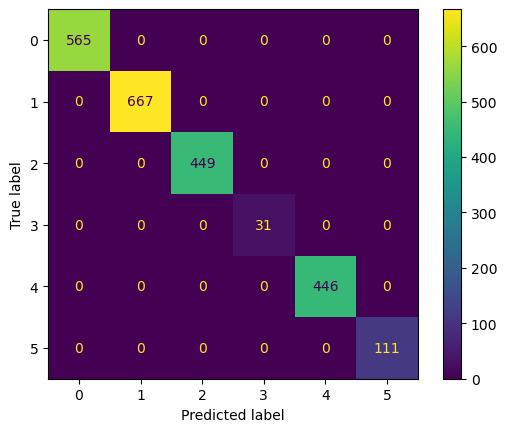

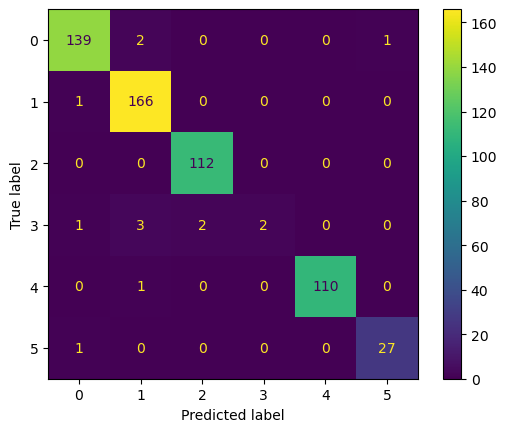

In [41]:
ConfusionMatrixDisplay.from_predictions(y_train,train_pred_xg)
ConfusionMatrixDisplay.from_predictions(y_test, test_pred_xg)


In [42]:
print(classification_report(y_train,train_pred_xg))
print()
print(classification_report(y_test, test_pred_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       565
           1       1.00      1.00      1.00       667
           2       1.00      1.00      1.00       449
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00       446
           5       1.00      1.00      1.00       111

    accuracy                           1.00      2269
   macro avg       1.00      1.00      1.00      2269
weighted avg       1.00      1.00      1.00      2269


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       142
           1       0.97      0.99      0.98       167
           2       0.98      1.00      0.99       112
           3       1.00      0.25      0.40         8
           4       1.00      0.99      1.00       111
           5       0.96      0.96      0.96        28

    accuracy                           0.98       568
   macro avg       0.9

In [43]:
print("Training Accuracy", accuracy_score(y_train, train_pred_xg))
print()
print("Test Accuracy", accuracy_score(y_test,test_pred_xg))

Training Accuracy 1.0

Test Accuracy 0.9788732394366197


### Random Forest

In [44]:
rft=RandomForestClassifier(n_estimators=12, criterion="entropy", random_state=0)
rft.fit(x_train_reduced,y_train)


# test set predict
test_pred_rft = rft.predict(x_test_reduced)
# train set predict
train_pred_rft = rft.predict(x_train_reduced)



In [45]:
print(classification_report(y_train,train_pred_rft))
print()
print(classification_report(y_test, test_pred_rft))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       565
           1       1.00      1.00      1.00       667
           2       1.00      1.00      1.00       449
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00       446
           5       1.00      1.00      1.00       111

    accuracy                           1.00      2269
   macro avg       1.00      1.00      1.00      2269
weighted avg       1.00      1.00      1.00      2269


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       142
           1       0.86      0.98      0.91       167
           2       0.99      0.99      0.99       112
           3       0.00      0.00      0.00         8
           4       1.00      0.93      0.96       111
           5       1.00      0.89      0.94        28

    accuracy                           0.94       568
   macro avg       0.8

In [46]:
print("Training Accuracy", accuracy_score(y_train, train_pred_rft))
print()
print("Test Accuracy", accuracy_score(y_test,test_pred_rft))

Training Accuracy 1.0

Test Accuracy 0.9401408450704225


### KNN Model

In [47]:

knn=KNeighborsClassifier(n_neighbors=9, metric="euclidean",)
knn.fit(x_train_reduced,y_train)


# test set predict
test_pred_knn = knn.predict(x_test_reduced)
# train set predict
train_pred_knn = knn.predict(x_train_reduced)


In [48]:
print(classification_report(y_train,train_pred_knn))
print()
print(classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       565
           1       0.95      0.80      0.87       667
           2       0.82      1.00      0.90       449
           3       0.56      0.16      0.25        31
           4       0.91      0.93      0.92       446
           5       0.86      0.91      0.89       111

    accuracy                           0.90      2269
   macro avg       0.84      0.79      0.79      2269
weighted avg       0.90      0.90      0.89      2269


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       142
           1       0.97      0.74      0.84       167
           2       0.80      0.99      0.88       112
           3       0.00      0.00      0.00         8
           4       0.87      0.95      0.91       111
           5       0.66      0.89      0.76        28

    accuracy                           0.87       568
   macro avg       0.7

In [49]:
print("Training Accuracy", accuracy_score(y_train, train_pred_knn))
print()
print("Test Accuracy", accuracy_score(y_test,test_pred_knn))

Training Accuracy 0.8981930365799912

Test Accuracy 0.8714788732394366


### Support Vector Machine

In [50]:
svc=SVC(C=1, kernel="rbf",degree=3)
svc.fit(x_train_reduced,y_train)


# test set predict
test_pred_svc = svc.predict(x_test_reduced)
# train set predict
train_pred_svc = svc.predict(x_train_reduced)


In [51]:
print(classification_report(y_train,train_pred_svc))
print()
print(classification_report(y_test, test_pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       565
           1       0.95      1.00      0.98       667
           2       1.00      1.00      1.00       449
           3       1.00      0.48      0.65        31
           4       1.00      0.97      0.99       446
           5       1.00      1.00      1.00       111

    accuracy                           0.98      2269
   macro avg       0.99      0.91      0.93      2269
weighted avg       0.98      0.98      0.98      2269


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       142
           1       0.86      0.99      0.92       167
           2       1.00      0.99      1.00       112
           3       0.00      0.00      0.00         8
           4       0.96      0.94      0.95       111
           5       1.00      0.86      0.92        28

    accuracy                           0.94       568
   macro avg       0.8

In [52]:
print("Training Accuracy", accuracy_score(y_train, train_pred_svc))
print()
print("Test Accuracy", accuracy_score(y_test,test_pred_svc))

Training Accuracy 0.9828118113706479

Test Accuracy 0.9401408450704225
